In [10]:
import numpy as np
from sklearn import datasets
import pandas as pd

In [11]:
# 将iris数据转换为Dataframe格式
iris = datasets.load_iris()

iris_X = iris.data
iris_y = iris.target 
irisdata = np.concatenate((iris_X, iris_y.reshape(-1, 1)), axis=1)
columns_label = ['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth', 'Species']
y_label = iris.target_names

irisDf = pd.DataFrame(data=irisdata, 
                      columns=columns_label)

for i in xrange(3):
    irisDf['Species'].replace(i, y_label[i], inplace=True)

In [12]:
# 查看数据
irisDf.head()

,Sepallength,Sepalwidth,Petallength,Petalwidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# 先大致描述数据
irisDf.describe()

,Sepallength,Sepalwidth,Petallength,Petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# 类别统计
irisDf["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [15]:
# 特征间的线性相关性
irisDf.corr(method='pearson')

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.109369,0.871754,0.817954
Sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
Petallength,0.871754,-0.420516,1.000000,0.962757
Petalwidth,0.817954,-0.356544,0.962757,1.000000


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f003f8bc290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f003f61fc90>]], dtype=object)

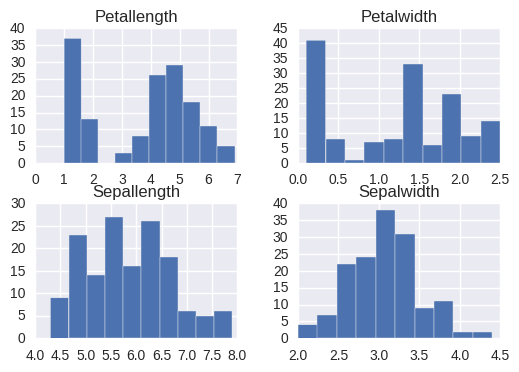

In [19]:
# 用pandas绘制直方图histogram
irisDf.hist()

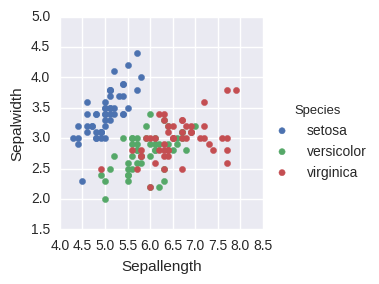

In [48]:
# 用seaborn绘制散点图scatter
sns.set(style="darkgrid", color_codes=True)
g = sns.FacetGrid(irisDf, hue="Species")
g.map(plt.scatter, "Sepallength", "Sepalwidth")
g.add_legend()

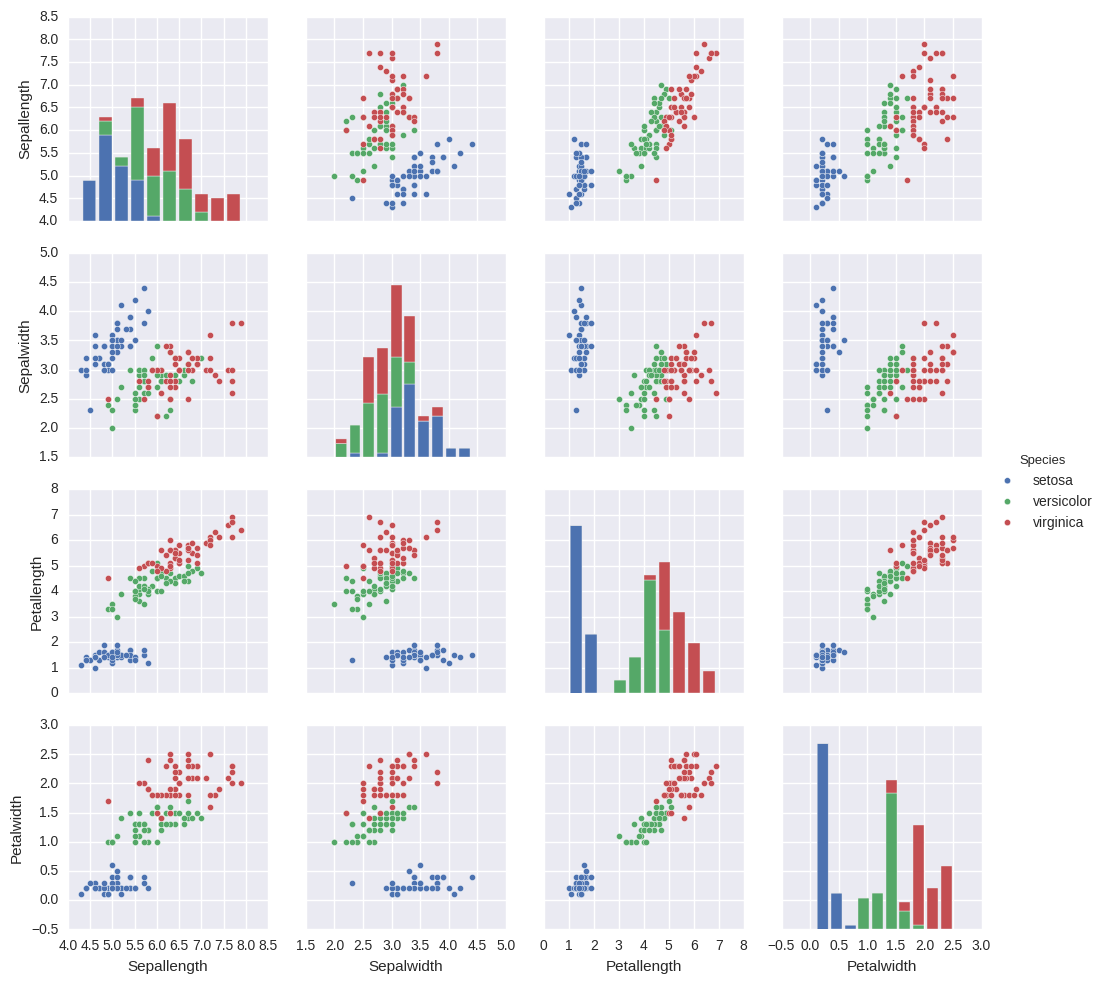

In [51]:
# 特征两两之间绘制散点图
sns.pairplot(irisDf, hue="Species")

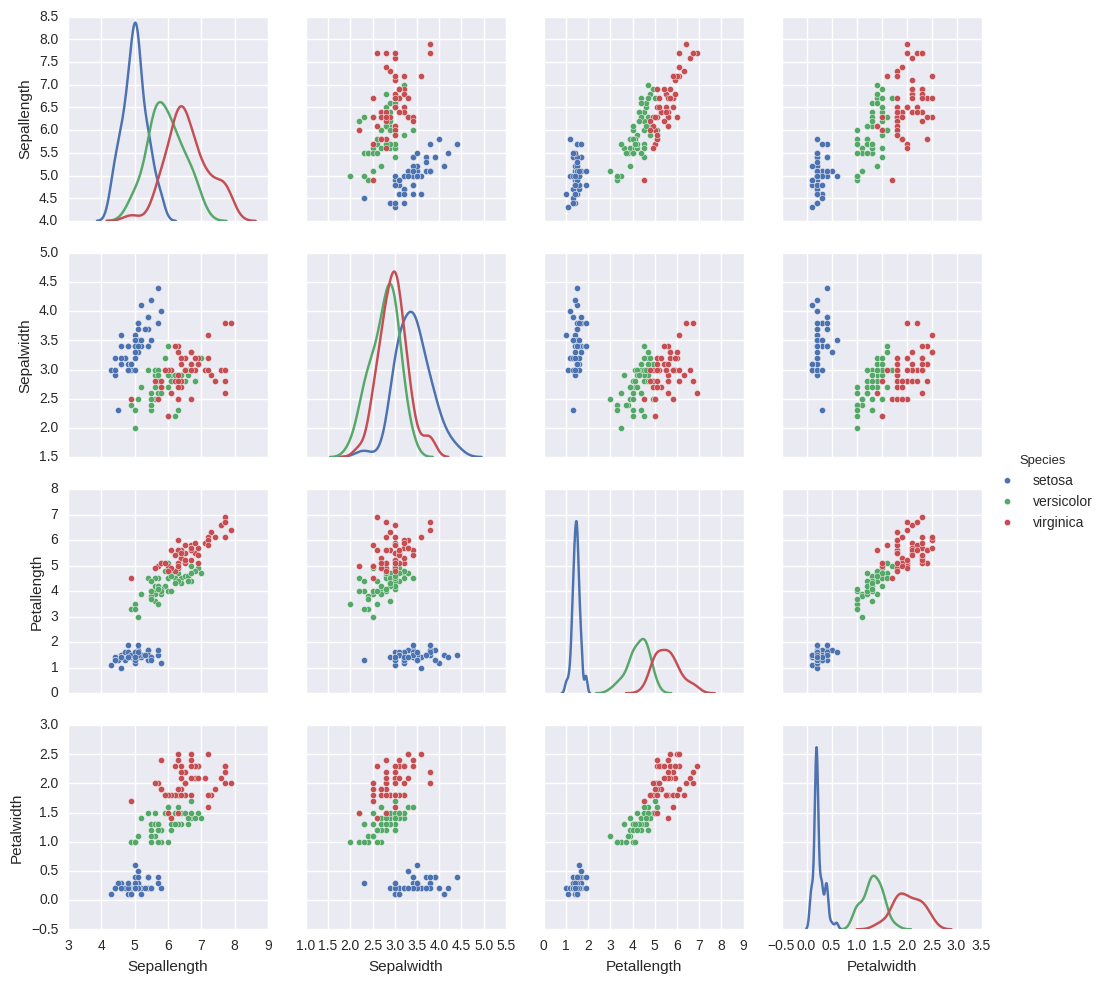

In [58]:
sns.pairplot(irisDf, hue="Species", diag_kind="kde")

{'boxes': [<matplotlib.lines.Line2D at 0x7efca46f09d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efca46fe790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efca470aa90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efca470a450>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7efca46f0b90>,
  <matplotlib.lines.Line2D at 0x7efca46de5d0>]}

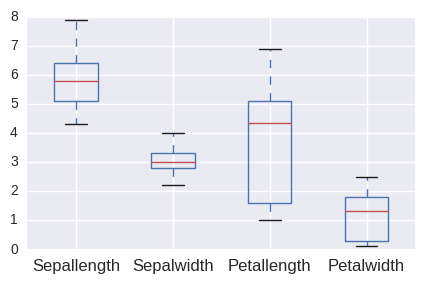

In [57]:
# 用pandas绘制箱线图boxplot
plt.figure(figsize=(5,3))
irisDf.boxplot(column=['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth'],  return_type='dict')

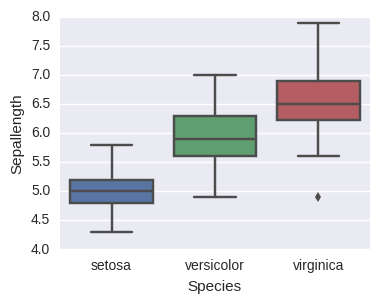

In [63]:
# 用seaborn画箱线图
plt.figure(figsize=(4,3))
sns.boxplot(x="Species", y="Sepallength", data=irisDf)

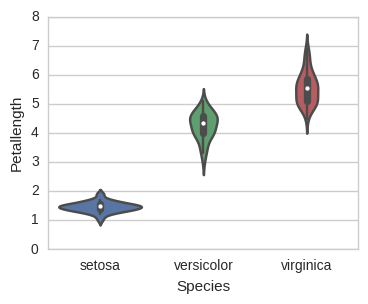

In [74]:
plt.figure(figsize=(4,3))
sns.violinplot(x="Species", y="Petallength", data=irisDf)

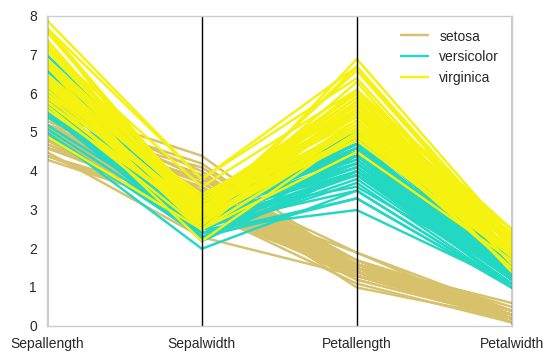

In [75]:
plt.figure(figsize=(6, 4))
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(irisDf, "Species")